In [3]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable

### Example 1

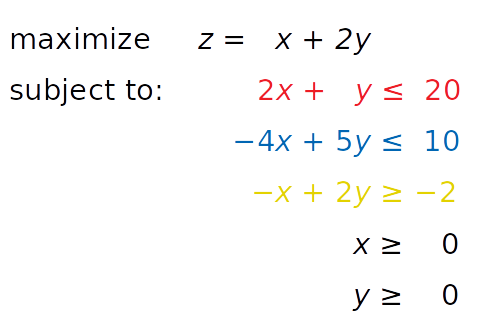

In [17]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "lp-py-eq-1.jpg", width = 200, height = 150)

In [4]:
# Create the model
model = LpProblem(name="sample-problem", sense=LpMaximize)

In [5]:
# Initialize the decision variables
x = LpVariable(name="x", lowBound=0)
y = LpVariable(name="y", lowBound=0)

In [6]:
# Add the constraints to the model
model += (2 * x + y <= 20, "red_constraint")
model += (4 * x - 5 * y >= -10, "blue_constraint")
model += (-x + 2 * y >= -2, "yellow_constraint")
model += (-x + 5 * y == 15, "green_constraint")

In [8]:
# Alternatively, it can be done in a shorter way
# Add the objective function to the model
model += x + 2 * y

C:\Users\Md Atiullah Khan\anaconda3\lib\site-packages\pulp\pulp.py:1537: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


In [9]:
# Full definition of the model
model

sample-problem:
MAXIMIZE
1*x + 2*y + 0
SUBJECT TO
red_constraint: 2 x + y <= 20

blue_constraint: 4 x - 5 y >= -10

yellow_constraint: - x + 2 y >= -2

green_constraint: - x + 5 y = 15

VARIABLES
x Continuous
y Continuous

In [10]:
# If you want to use the default solver (CBC), then we don’t have to pass any arguments
# Solve the problem
status = model.solve()

In [11]:
print(f"status: {model.status}, {LpStatus[model.status]}")

status: 1, Optimal


In [12]:
print(f"objective: {model.objective.value()}")

objective: 16.8181817


In [13]:
for var in model.variables():
    print(f"{var.name}: {var.value()}")

x: 7.7272727
y: 4.5454545


In [14]:
for name, constraint in model.constraints.items():
    print(f"{name}: {constraint.value()}")

red_constraint: -9.99999993922529e-08
blue_constraint: 18.181818300000003
yellow_constraint: 3.3636362999999996
green_constraint: -2.0000000233721948e-07


### Example 2

Say that a factory produces four different products, and that the daily produced amount of the first product is x₁, 
the amount produced of the second product is x₂, and so on. The goal is to determine the profit-maximizing daily production amount 
for each product, bearing in mind the following conditions:

1. The profit per unit of product is $20, $12, $40, and $25 for the first, second, third, and fourth product, respectively.
2. Due to manpower constraints, the total number of units produced per day can’t exceed fifty.
3. For each unit of the first product, three units of the raw material A are consumed. Each unit of the second product requires
   two units of the raw material A and one unit of the raw material B. Each unit of the third product needs one unit of A and two units of B. 
   Finally, each unit of the fourth product requires three units of B.
4. Due to the transportation and storage constraints, the factory can consume up to one hundred units of the raw material A and 
   ninety units of B per day.

The mathematical model can be defined like this:

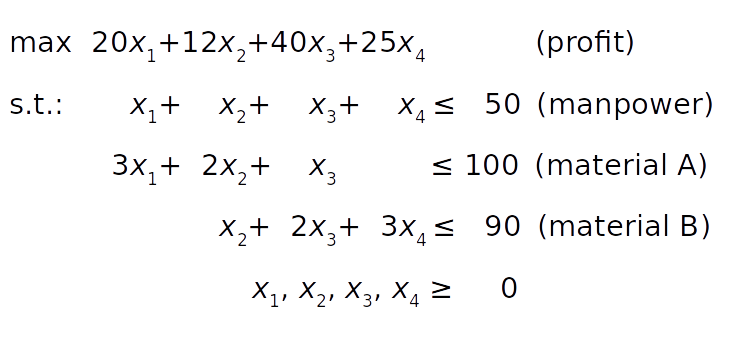

In [22]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "lp-py-eq-4.jpg", width = 300, height = 300)

In [24]:
# Define the model
model = LpProblem(name="resource-allocation", sense=LpMaximize)

# Define the decision variables
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 5)}

# Add constraints
model += (lpSum(x.values()) <= 50, "manpower")
model += (lpSum([3 * x[1], 2 * x[2], x[3]]) <= 100, "material_a")
model += (lpSum([x[2], 2 * x[3], 3 * x[4]]) <= 90, "material_b")

# Set the objective
model += 20 * x[1] + 12 * x[2] + 40 * x[3] + 25 * x[4]

# Solve the optimization problem
status = model.solve()

# Get the results
print(f"status: {model.status}, {LpStatus[model.status]}")
print(f"objective: {model.objective.value()}")

for var in x.values():
    print(f"{var.name}: {var.value()}")

for name, constraint in model.constraints.items():
    print(f"{name}: {constraint.value()}")

status: 1, Optimal
objective: 1900.0
x1: 5.0
x2: 0.0
x3: 45.0
x4: 0.0
manpower: 0.0
material_a: -40.0
material_b: 0.0
